In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [78]:
# Generate some random data
np.random.seed(42)
n_samples, n_features = 200, 50

# X values
X = np.random.randn(n_samples, n_features)
true_coef = 3 * np.random.randn(n_features)
# Threshold coefficients to render them non-negative
true_coef[true_coef < 0] = 0
# Y values
y = np.dot(X, true_coef)

print(X.shape)
print(true_coef.shape)
print(y.shape)


(200, 50)
(50,)
(200,)


In [79]:
type(X)

numpy.ndarray

In [80]:
# Add some noise
print('X ',np.amin(X),np.amax(X))
print('y - before ',min(y),max(y))
y += 5 * np.random.normal(size=(n_samples, ))
print('y - after ',min(y),max(y))


X  -3.9224002516183423 3.9262377064363267
y - before  -40.8533250437941 35.82539237708231
y - after  -43.928045556374315 38.34596737415982


In [81]:
# Split the data in train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
print('train ',X_train.shape,y_train.shape)
print('test ',X_test.shape,y_test.shape)

train  (100, 50) (100,)
test  (100, 50) (100,)


In [82]:
# Normal
reg_ols = LinearRegression()
y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_score_ols = r2_score(y_test, y_pred_ols)
print("OLS R2 score", r2_score_ols)

OLS R2 score 0.7436926291700352


In [83]:
reg_nnls = LinearRegression()

y_train_nn = abs(y_train).copy()
y_test_nn = abs(y_test).copy()
X_train_nn = abs(X_train).copy()
X_test_nn = abs(X_test).copy()

y_pred_nnls = reg_nnls.fit(X_train_nn, y_train_nn).predict(X_test_nn)
r2_score_nnls = r2_score(y_test_nn, y_pred_nnls)
print("NNLS R2 score", r2_score_nnls)
print(y_pred_nnls.shape)

NNLS R2 score -0.6736741572439489
(100,)


Text(0, 0.5, 'NNLS regression coefficients')

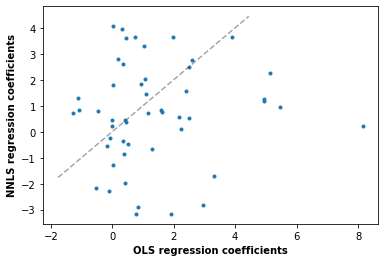

In [84]:
fig, ax = plt.subplots()
ax.plot(reg_ols.coef_, reg_nnls.coef_, linewidth=0, marker=".")

low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c=".3", alpha=.5)
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("NNLS regression coefficients", fontweight="bold")

In [85]:
reg_nnls = LinearRegression()

y_train_nn = y_train.copy()
y_train_nn[y_train < 0] = 0
y_test_nn = y_test.copy()
y_test_nn[y_test < 0] = 0
X_train_nn = X_train.copy()
X_train_nn[X_train < 0] = 0
X_test_nn = abs(X_test).copy()
X_test_nn[X_test < 0] = 0

y_pred_nnls = reg_nnls.fit(X_train_nn, y_train_nn).predict(X_test_nn)
r2_score_nnls = r2_score(y_test_nn, y_pred_nnls)
print("NNLS R2 score", r2_score_nnls)
print(y_pred_nnls.shape)

NNLS R2 score 0.03927390832985356
(100,)


Text(0, 0.5, 'NNLS regression coefficients')

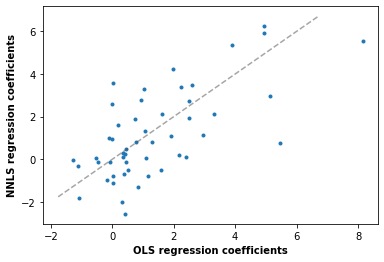

In [86]:
fig, ax = plt.subplots()
ax.plot(reg_ols.coef_, reg_nnls.coef_, linewidth=0, marker=".")

low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c=".3", alpha=.5)
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("NNLS regression coefficients", fontweight="bold")